In [ ]:
#In this lab I used the Iris dataset.
#Q.From the dataset, define your training set, target variable, test set, and splitting.
from sklearn import datasets
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Task-i

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Linear
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
y_pred_linear = linear_svc.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy with Linear Kernel:", accuracy_linear)

#Polynomial kernel
poly_svc = SVC(kernel='poly')
poly_svc.fit(X_train, y_train)
y_pred_poly = poly_svc.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy with Polynomial Kernel:", accuracy_poly)

# Radial basis function (RBF) kernel
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy with RBF Kernel:", accuracy_rbf)


# Sigmoid kernel
sigmoid_svc = SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train, y_train)
y_pred_sigmoid = sigmoid_svc.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy with Sigmoid Kernel:", accuracy_sigmoid)


Accuracy with Linear Kernel: 1.0
Accuracy with Polynomial Kernel: 0.9777777777777777
Accuracy with RBF Kernel: 1.0
Accuracy with Sigmoid Kernel: 0.2222222222222222


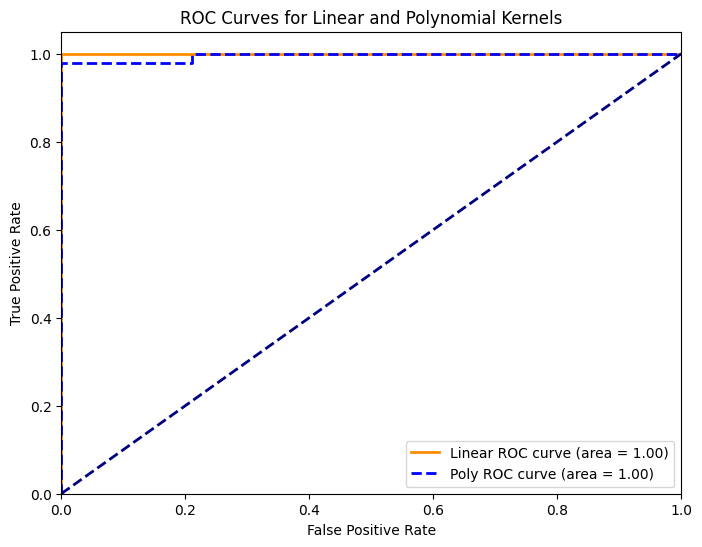

In [ ]:
#task-ii
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Linear kernel
y_prob_linear = linear_svc.decision_function(X_test)
fpr_linear, tpr_linear, _ = roc_curve(y_test_bin.ravel(), y_prob_linear.ravel())
roc_auc_linear = auc(fpr_linear, tpr_linear)

# Polynomial kernel
y_prob_poly = poly_svc.decision_function(X_test)
fpr_poly, tpr_poly, _ = roc_curve(y_test_bin.ravel(), y_prob_poly.ravel())
roc_auc_poly = auc(fpr_poly, tpr_poly)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))

# Linear kernel
plt.plot(fpr_linear, tpr_linear, color='darkorange', lw=2, label=f'Linear ROC curve (area = {roc_auc_linear:.2f})')

# Polynomial kernel
plt.plot(fpr_poly, tpr_poly, color='blue', lw=2, label=f'Poly ROC curve (area = {roc_auc_poly:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear and Polynomial Kernels')
plt.legend(loc='lower right')
plt.show()

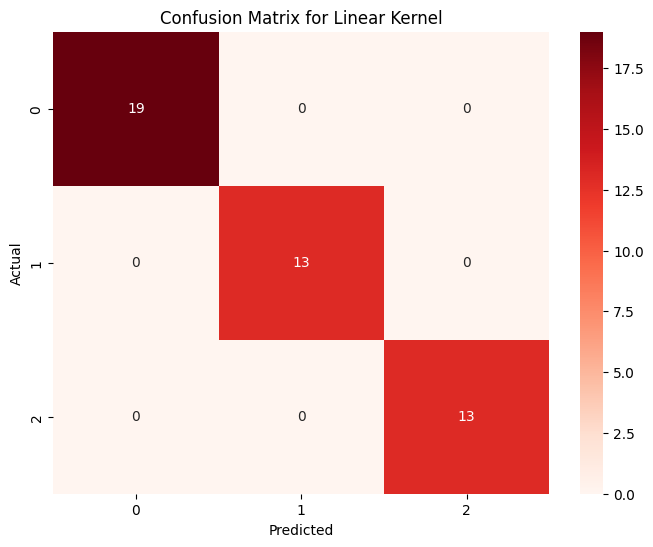

In [ ]:
#task-iii
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Kernel')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svc = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


y_pred_best = best_svc.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with Best Hyperparameters:", accuracy_best)

Best Hyperparameters: {'C': 100, 'gamma': 0.01}
Accuracy with Best Hyperparameters: 1.0
